## Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import numpy as np # linear algebra
import pandas as pd #data processing

import os
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier 
import xgboost as xgb
from sklearn import model_selection, naive_bayes, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving merged fake news copy.csv to merged fake news copy.csv


In [3]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['merged fake news copy.csv'].decode('utf-8')), sep = ',')
df

,title,text,result,category
0,Donald Trump Sends Out Embarrassing New Year‚...,Donald Trump just couldn t wish all Americans ...,1,Politics
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,Politics
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,Politics
3,Trump Is So Obsessed He Even Has Obama‚Äôs Na...,"On Christmas day, Donald Trump announced that ...",1,Politics
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,Politics
...,...,...,...,...
65644,Texas Church Shooter Was Antifa Member Who Vow...,The gunman who opened fire inside a church in ...,1,buzzfeed
65645,Servicio militar OBLIGATORIO para jvenes de 18...,Encontrada una sirena real en la playa de Cara...,1,buzzfeed
65646,Man accused of ejaculating in his boss coffee ...,"Newark, New Jersey | A man was arrested on his...",1,buzzfeed
65647,BREAKING: Charles Manson Dies in California Ho...,"0 STOCKTON, California Charles Manson, the no...",1,buzzfeed


## Reading the data

In [4]:
df.head()

,title,text,result,category
0,Donald Trump Sends Out Embarrassing New Year‚...,Donald Trump just couldn t wish all Americans ...,1,Politics
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,Politics
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,Politics
3,Trump Is So Obsessed He Even Has Obama‚Äôs Na...,"On Christmas day, Donald Trump announced that ...",1,Politics
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,Politics


In [5]:
print(df.shape)

(65649, 4)


In [6]:
print(df.isnull().sum())

title       558
text         57
result        0
category      0
dtype: int64


In [7]:
# Replacing NAs with ' ', removing duplicates, getting value counts

df = df.fillna(' ')
df= df.drop_duplicates(keep=False)
df.category.value_counts()

news        25468
politics    19723
News         8813
Politics     1043
sports        333
buzzfeed       33
Name: category, dtype: int64

## Test-Train split

In [8]:
# Creating Test data

# Define total test sample size desired (30% of total data)
N = 16625

# Perform stratified random sampling
test = df.groupby('category', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)


In [9]:
print(test.shape)

(16625, 4)


In [10]:
test.category.value_counts()

news        7641
politics    5917
News        2644
Politics     313
sports       100
buzzfeed      10
Name: category, dtype: int64

In [11]:
# Creating train data

train = pd.concat([df, test])
train = train.drop_duplicates(keep=False)

In [12]:
print(train.shape)

(38788, 4)


In [13]:
train.category.value_counts()

news        17827
politics    13806
News         6169
Politics      730
sports        233
buzzfeed       23
Name: category, dtype: int64

In [14]:
print(train.shape, test.shape)

(38788, 4) (16625, 4)


In [15]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

title       0
text        0
result      0
category    0
dtype: int64
************
title       0
text        0
result      0
category    0
dtype: int64


In [16]:
test=test.fillna(' ')
train=train.fillna(' ')
test['total']=test['title']+' '+test['text']
train['total']=train['title']+' '+train['text']

## Creating Wordcloud Visuals (takes time to run)

In [17]:
# import sys
# print(sys.executable)

# !C:/Users/ssutar/Anaconda3/python -m pip install wordcloud
    
# conda install -c conda-forge wordcloud=1.6.0 

from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS 
%matplotlib inline
import seaborn as sns

real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
# Iterate through the csv file 
for val in train[train['result']==1].total: 
  
    # Split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['result']==0].total: 
      
    # Split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

### Real Words

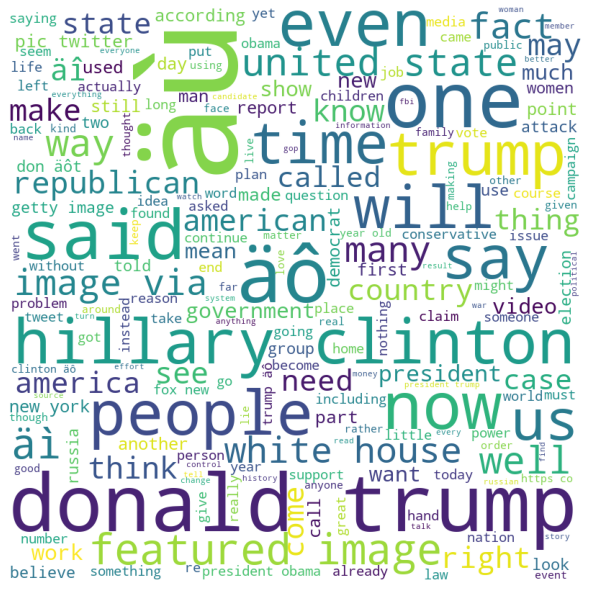

In [18]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(real_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Fake Words

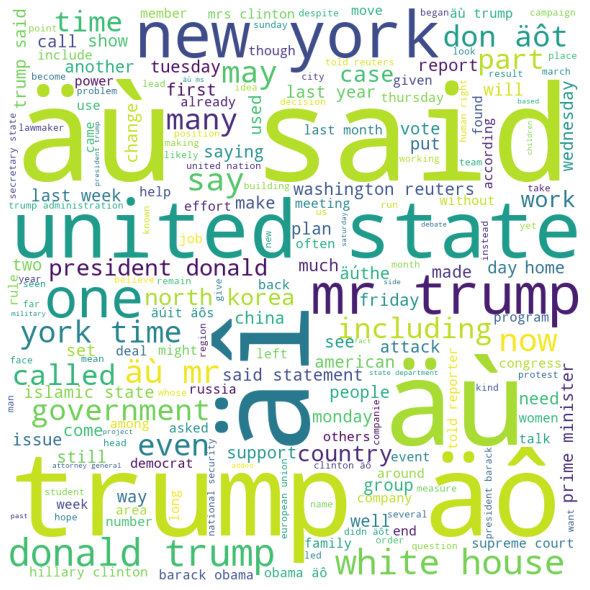

In [19]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(fake_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Applying Regex, Tokenization, StopWords, Lemmatization (Takes time to run)

In [22]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) # Cleaning
    
    words = nltk.word_tokenize(sentence) # Tokenization
    
    words = [w for w in words if not w in stop_words]  # Stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'total'] = filter_sentence


train = train[['total','result']]

## Applying NLP techniques CountVectorizer, TF-iDF Vectorizer

In [23]:
X_train = train['total']
Y_train = train['result']

In [24]:
# Feature extraction using count vectorization and tfidf

count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

## Modelling

In [25]:
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts)

# Split in samples
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

### MultinomialNB

In [26]:
# MultinomialNB

clf= MultinomialNB().fit(X_train, y_train)
predicted_NB = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predicted_NB))

Accuracy: 0.8593379395689389


### Decision Tree

In [27]:
# Decision Tree

dtree_model = DecisionTreeClassifier(max_depth=15, random_state=42).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, dtree_predictions))

Accuracy: 0.9814375580076312


### Random Forest (takes time to run)

In [ ]:
# Random Forest

RFclassifier = RandomForestClassifier()
RFclassifier.fit(X_train, y_train)
predicted_RF = RFclassifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predicted_RF))

Accuracy: 0.9524595235639889


### XG Boost

In [28]:
# XG Boost

xgb_classifier = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgb_classifier.fit(X_train, y_train)
xgb_classifier.score(X_test, y_test)
predicted_XGB = xgb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predicted_XGB))

Accuracy: 0.9615344952047025


### SVM (takes a lot of time to run)


In [ ]:
# SVM

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train, y_train)
predicted_SVM = SVM.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predicted_SVM))

Accuracy: 0.9856656697947819


## Pipeline

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.externals import joblib
# from sklearn import linear_model

In [ ]:
# pipeline = Pipeline([
#     ('vect', CountVectorizer()),
#     ('tfidf', TfidfTransformer(norm='l2')),
#     ('clf', linear_model.LogisticRegression(C=1e5)),
# ])

In [ ]:
# pipeline.fit(X_train, Y_train)

In [ ]:
# pipeline.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

In [ ]:
# #saving the pipeline
# filename = 'pipeline.sav'
# joblib.dump(pipeline, filename)

In [ ]:
# filename = './pipeline.sav'

## Prediction

In [ ]:
# loaded_model = joblib.load(filename)
# result = loaded_model.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])
# print(result) 